In [33]:
import numpy as np # linear algebra
import pandas as pd # for data preparation
import plotly.express as px # for data visualization
from textblob import TextBlob # for sentiment analysis
import matplotlib.pyplot as plt

In [34]:
dff=pd.read_csv('netflix_titles.csv')
dff.shape
dff.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

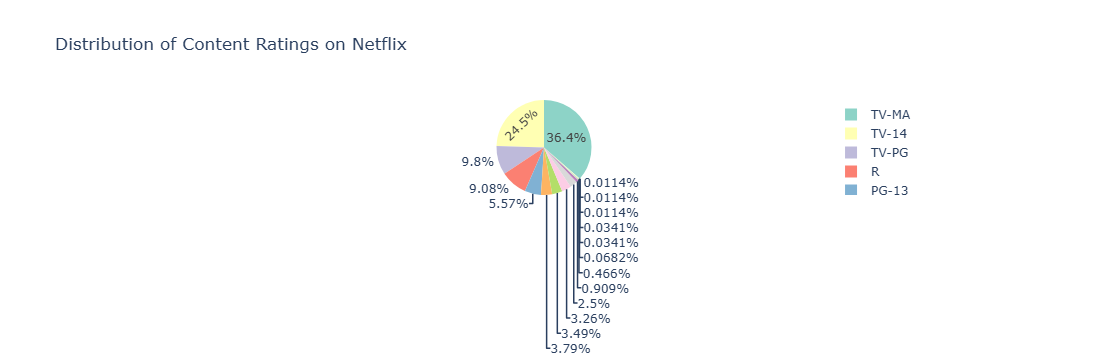

In [35]:
z = dff.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

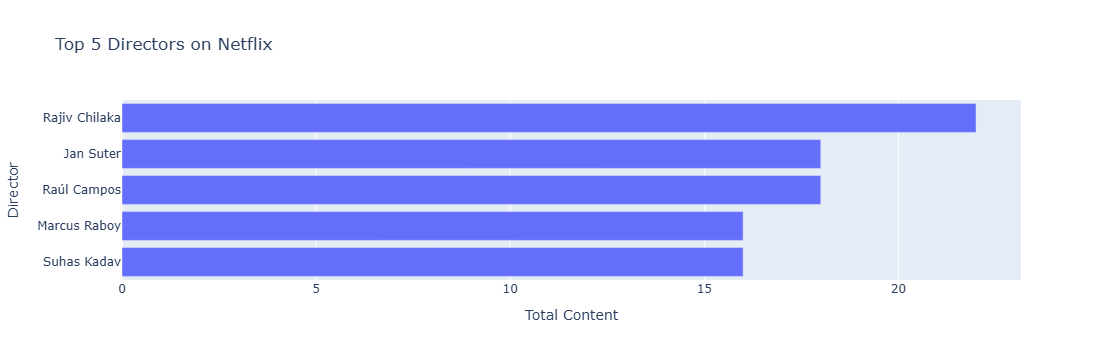

In [36]:
dff['director']=dff['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=dff['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

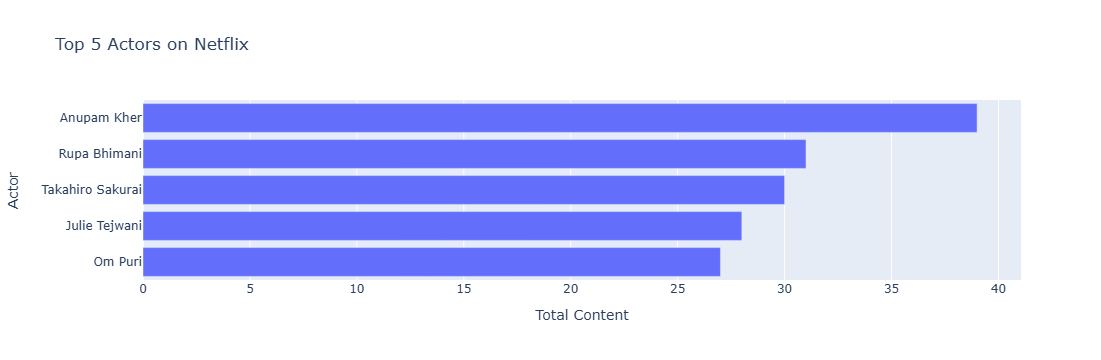

In [37]:
dff['cast']=dff['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=dff['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor', title='Top 5 Actors on Netflix')
fig2.show()

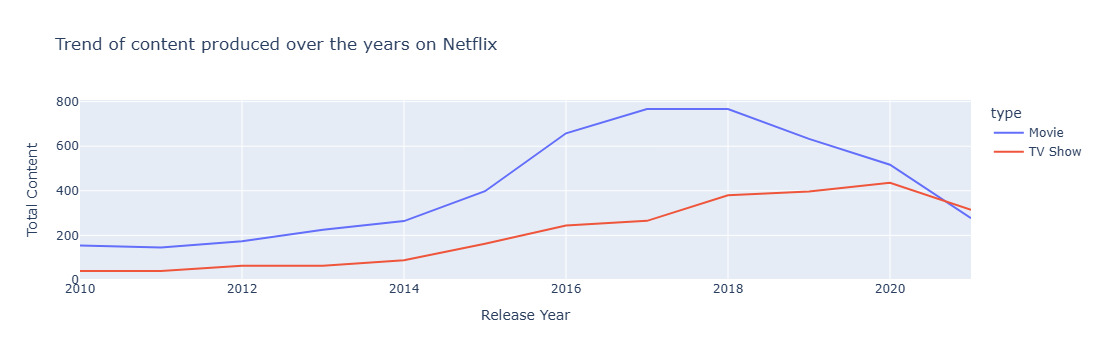

In [38]:
df1=dff[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

In [39]:
dfx=dff[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent

In [40]:
dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

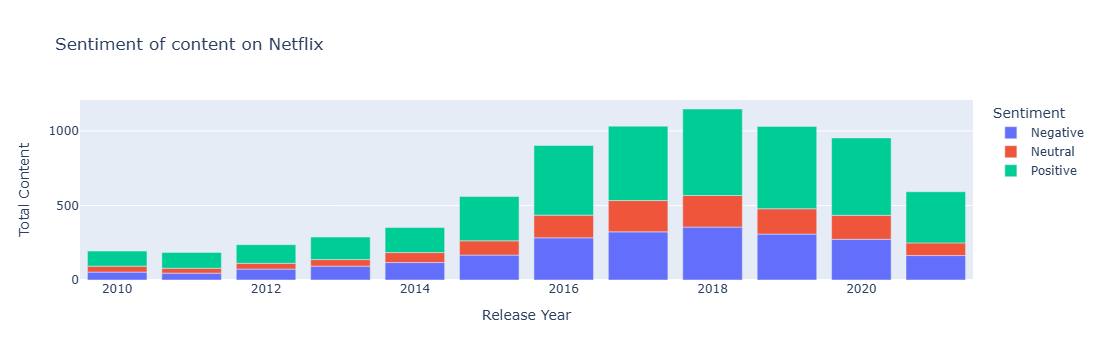

In [41]:
dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

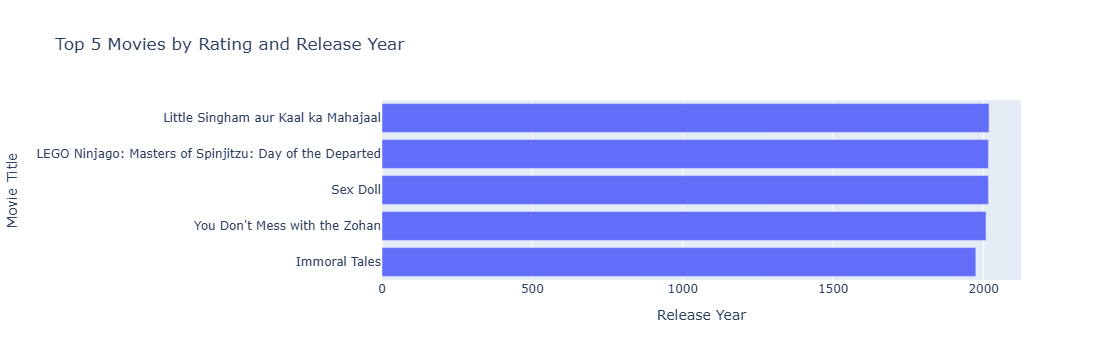

In [42]:
# Filter for movies
movies_df = dff[dff['type'] == 'Movie']

# Assuming you want to sort by rating and then release year (descending order)
# If rating is a numerical column, otherwise skip rating and sort by release_year
top_movies = movies_df.sort_values(by=['rating', 'release_year'], ascending=[False, False]).head(5)

# Select the title column for the top 5 movies
top_5_movie_titles = top_movies[['title', 'release_year']]

# Create an interactive bar plot
fig = px.bar(
    top_5_movie_titles,
    x='release_year',
    y='title',
    orientation='h',
    title='Top 5 Movies by Rating and Release Year',
    labels={'release_year': 'Release Year', 'title': 'Movie Title'},
    hover_data={'title': True, 'release_year': True}
)

# Update layout to invert y-axis to have the highest rated movie on top
fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Show the plot
fig.show()

In [43]:
movies_df1 = dff[dff['type'] == 'Movie']

# Group by country and count the number of movies
country_movie_counts = movies_df1['country'].value_counts()

# Find the country with the highest count
most_movies_country = country_movie_counts.idxmax()
most_movies_count = country_movie_counts.max()

print(f"The country that produces the most movies is: {most_movies_country} with {most_movies_count} movies.")

The country that produces the most movies is: United States with 2058 movies.


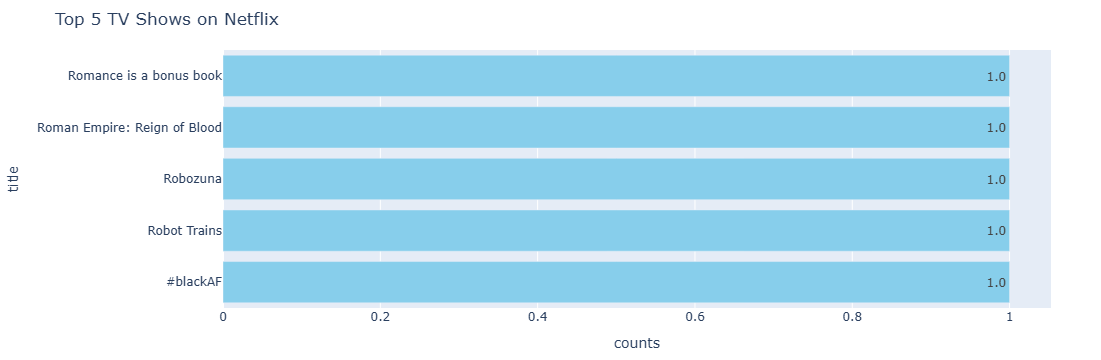

In [44]:
# Filter to include only TV Shows
tv_shows = dff.loc[dff['type'] == 'TV Show']

# Group by title and rating to count occurrences
top_5_tv_shows = tv_shows.groupby(['title', 'rating']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(5)

# Create the bar chart
fig = px.bar(top_5_tv_shows, 
             y='title', 
             x='counts', 
             title='Top 5 TV Shows on Netflix',
             text_auto='.2s',  # show text on hover
             color_discrete_sequence=['skyblue']*len(top_5_tv_shows))  # use a consistent color

# Update layout and traces
fig.update_layout(margin=dict(t=50, b=50, l=50, r=50))  # reduce margins
fig.update_traces(hovertemplate='Title: %{y}<br>Count: %{x}<extra></extra>')  # custom hover text
fig.update_layout(yaxis=dict(tickmode='array', tickvals=top_5_tv_shows['title'], ticktext=top_5_tv_shows['title'].astype(str)))  # show title values on y-axis

# Show the figure
fig.show()